# Machine Learning II Project

Group Members:
- Daniel Kruk
- Marcelo Junior <br>

# Association Rules
In this section, we will use the apriori algorithm to find the association rules between the items in the dataset. The algorithm is based on the idea that if an itemset is frequent, then all of its subsets are frequent.
This notebook will be divided into the following sections:
1. Importing the libraries
2. Importing the dataset
3. Splitting the dataset into the Training set and Test set with an own implementation of the train_test_split function for clustering
4. Visualising the clusters for the training and test sets
5. Applying the apriori algorithm to the training set to find the association rules and then applying them to the test set to evaluate the performance of the model.
6. Applying the apriori algorithm to the whole dataset to find the association rules as an alternative to the previous step.


# Importing the libraries
First, we will import the libraries that will be used in this notebook.

In [1]:
# Install libraries if needed (uncomment the lines below)
#!pip install mlxtend

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval

# Utils package
from utils import (
    visualise_cluster,
    analyse_clusters,
    cluster_train_test_split
)

# Matplotlib Options
plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

# Pandas options
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', None)

# Importing the dataset

The fist step is to import the datasets.

In [33]:
customer_basket = pd.read_csv('Project Data/Customer Basket Dataset.csv')
product_map = pd.read_excel('Project Data/Product Mapping PPC.xlsx')
customer_hdbscan = pd.read_csv('Project Data/Full Clustered Final.csv')

Now to see how list_of_goods is structured.

In [34]:
customer_basket.dtypes

customer_id       int64
invoice_id        int64
list_of_goods    object
dtype: object

Currently, the list_of_goods column is a string. It should be a list of strings.

In [35]:
# Convert into list
customer_basket['list_of_goods'] = customer_basket['list_of_goods'].apply(literal_eval)

With this done, the clusters can be added to the dataset.

In [36]:
# Merging the customer_basket and customer_clustering datasets on customer_id
customer_basket_cl = pd.merge(customer_basket, customer_hdbscan, on='customer_id', how='left')
customer_basket_cl

,customer_id,invoice_id,list_of_goods,customer_name,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,total_minors,total_spending,lifetime_spend_tech,cluster_hdbscan
0,7980,6494405,"[fresh bread, cake, grated cheese, french fries, whole wheat pasta, candy bars, beats headphones, half-life 2, phone car charger, cream, cereals, babies food]",Elizabeth Skinner,3,0,33,5.0,2.0,1.0,3.0,4880.0,193.0,18.0,538.0,1091.0,291.0,1203.0,1168.0,480.0,980.0,1923.0,0.200289,2004.0,974664.0,38.743242,-9.169520,1,7.0,10824.0,1173.0,Family Friendly
1,9995,6855482,"[bramble, beer, white wine, almonds, half-life: alyx, cauliflower, cider, yogurt cake, champagne, chili, soda, black beer, catfish]",Sandra Galindo,0,0,81,0.0,1.0,0.0,2.0,1509.0,586.0,1.0,398.0,300.0,290.0,46.0,161.0,47.0,207.0,87.0,0.080874,2012.0,NaN,38.724625,-9.131744,0,1.0,3544.0,793.0,Bang-Average Consumers
2,10060,3614116,"[fromage blanc, olive oil, tomato sauce, avocado, megaman zero 2, cooking oil, iPad, shampoo, oil, green tea]",Timothy Dalrymple,3,1,30,0.0,0.0,0.0,5.0,6955.0,1174.0,20.0,421.0,401.0,403.0,733.0,743.0,279.0,539.0,460.0,0.148709,2006.0,NaN,38.763968,-9.095142,0,0.0,11648.0,1713.0,Young&Rich
3,1461,6464656,"[pokemon shield, white wine, google tablet, canned_tuna, green beans, bacon, cider, pokemon sword, beats headphones, airpods, phone charger, metroid prime]",Donald Farrell,2,1,42,0.0,0.0,0.0,2.0,181.0,4773.0,21.0,21.0,1472.0,513.0,154.0,6.0,29.0,2078.0,88.0,0.098668,2007.0,992494.0,38.716332,-9.174885,1,0.0,9227.0,6851.0,Geeks
4,7830,10330249,"[olive oil, deodorant, whole weat flour, chutney, escalope, gums, rice, airpods, oil, cookies, muffins, laptop]",Brain Morris,0,1,83,1.0,1.0,1.0,20.0,499.0,20.0,10.0,264.0,249.0,231.0,171.0,196.0,65.0,5.0,528.0,0.500013,2008.0,NaN,38.767383,-9.181123,0,2.0,1700.0,25.0,Promo Seekers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,360,11470275,"[tomatoes, ham, zucchini, frozen vegetables, mashed potato, asparagus, melons, razor, cauliflower, carrots, strawberries]",Anna Dubard,1,0,39,1.0,1.0,0.0,2.0,1146.0,47.0,9.0,1509.0,26.0,20.0,0.0,0.0,107.0,54.0,218.0,0.049697,2010.0,939222.0,38.775839,-9.183154,1,2.0,2909.0,101.0,Green Beans
79996,3116,7483644,"[pet food, soup, beer, fromage blanc, napkins, parmesan cheese, whole weat flour, cooking oil, pepper, iphone 8, gums, rice, oil, muffins]",Cathryn Farrell,2,0,27,0.0,0.0,0.0,3.0,6950.0,995.0,17.0,364.0,340.0,423.0,742.0,655.0,203.0,528.0,648.0,0.155770,2011.0,991356.0,38.746061,-9.192923,1,0.0,11200.0,1523.0,Young&Rich
79997,1546,9168204,"[cake, french fries, cooking oil, muffins, honey, vegetables mix, airpods, oil, phone charger, ketchup, babies food]",Hilda Plescia,1,0,76,0.0,0.0,1.0,3.0,5019.0,205.0,20.0,727.0,894.0,490.0,1066.0,1024.0,327.0,967.0,2013.0,0.199767,2012.0,904944.0,38.747054,-9.150733,1,0.0,10719.0,1172.0,Family Friendly
79998,7242,5054623,"[fromage blanc, napkins, sandwich, honey, oil, cottage cheese, cream, french wine, muffins]",Nicholas Barajas,1,1,74,1.0,0.0,1.0,8.0,15549.0,198.0,12.0,792.0,1055.0,612.0,1687.0,1490.0,252.0,53.0,3538.0,0.150241,2001.0,927672.0,38.752916,-9.136822,1,1.0,21688.0,251.0,Loyals


Before applying the apriori algorithm, the dataset should be split into training and test sets. The training set will be used to find the association rules and the test set will be used to evaluate the performance of the model. <br>
To ensure that the clusters are represented in both the training and test sets, the dataset will be split by cluster before splitting into training and test sets, after which the respective sets of all clusters will be combined. <br>

In [37]:
# Splitting the dataset into the Training set and Test set with a test size of 30%
X_train, X_test = cluster_train_test_split(customer_basket_cl, test_size=0.3, random_state=0)

Splitting data into training and testing sets...
Done!


To get a better idea of the data, it is useful to know how many transactions are in each cluster. <br>
The following code will create a bar chart showing the number of transactions in each cluster. The first one is for the training set and the second one is for the test set.

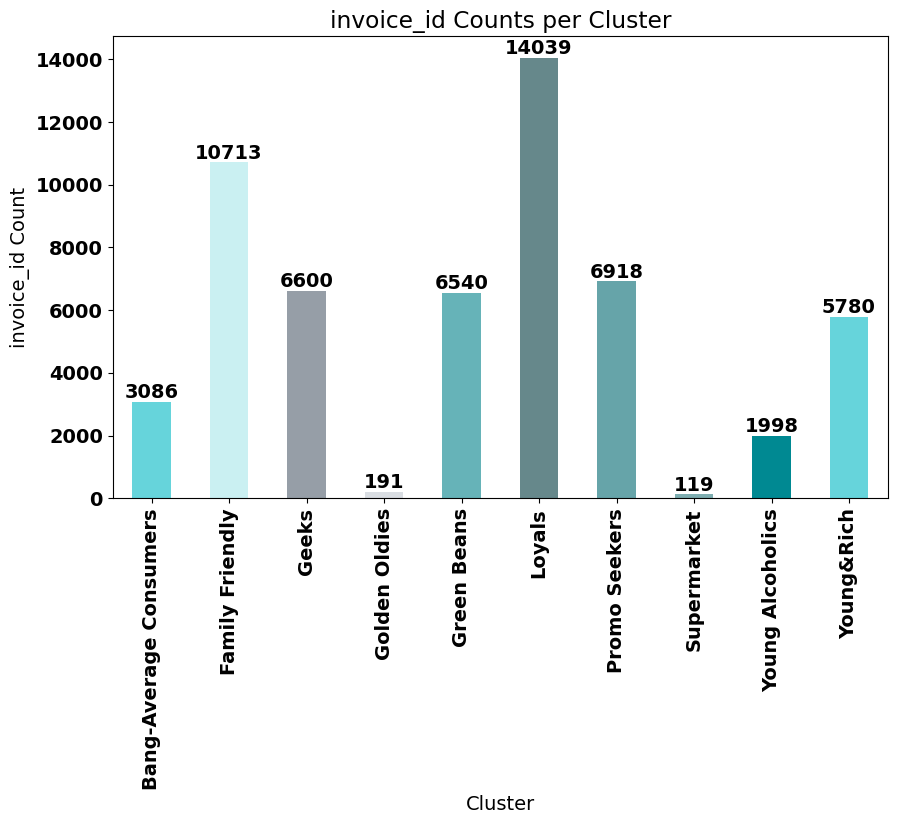

In [38]:
# Use the function visualise_cluster from utils to visualise the clusters
visualise_cluster(X_train, 'cluster_hdbscan', 'invoice_id')

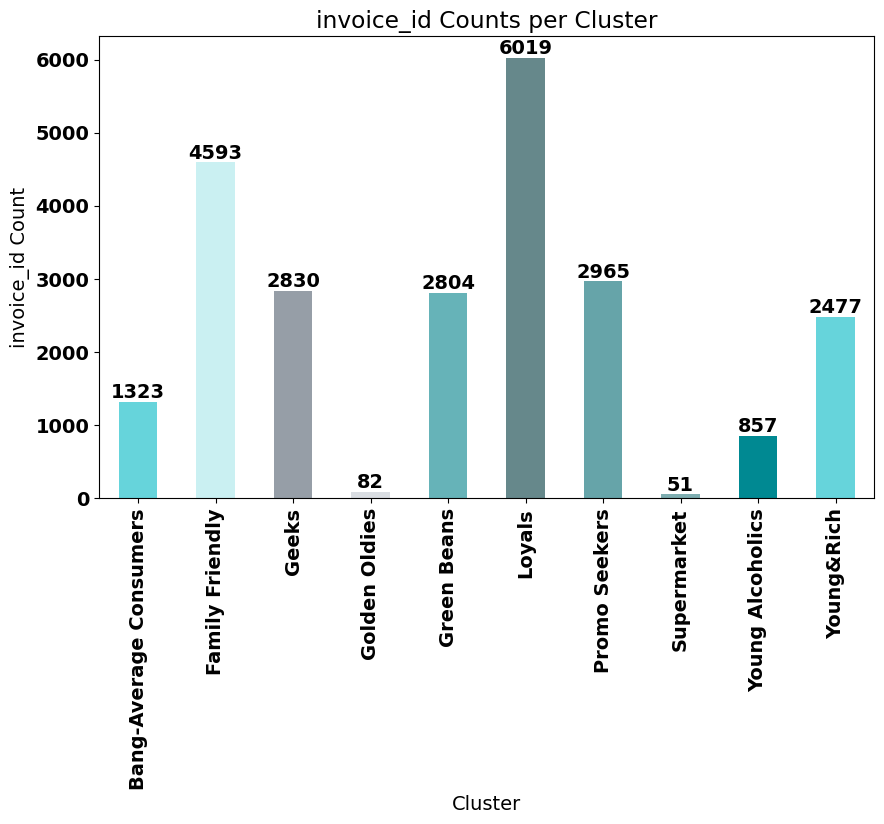

In [39]:
visualise_cluster(X_test, 'cluster_hdbscan', 'invoice_id')

While doing train test split, it is important to make sure that the clusters are well represented in both the training and test sets. This can be done by looking at the number of transactions in each cluster. <br>
What can be seen is that Supermarkets and the Golden Oldies are the least represented clusters in the test set. This is not ideal, but it should not be a major issue. <br>
The next step is to apply the apriori algorithm to the training set to find the association rules and then apply them to the test set to evaluate the performance of the model.

In [40]:
# Function from utils to analyse the association rules of the clusters
analyse_clusters(X_train, X_test)

Analysing clusters...

Analysing cluster Family Friendly...
Cluster Family Friendly Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
344,"(fromage blanc, soup)",(cake),0.015864,0.511945,0.010265,0.647059,1.263923,0.002143,1.382823,0.212179
1641,"(pet food, candy bars, gums)","(babies food, cake)",0.019037,0.447555,0.010265,0.539216,1.204803,0.001745,1.198923,0.173288
1038,"(escalope, gums)","(babies food, cooking oil)",0.016331,0.564763,0.011105,0.680000,1.204045,0.001882,1.360116,0.172280
1383,"(french fries, oil, cake)",(cooking oil),0.014091,0.645857,0.010918,0.774834,1.199700,0.001817,1.572813,0.168838
1593,"(french fries, soup, candy bars)","(babies food, cake)",0.019690,0.447555,0.010545,0.535545,1.196601,0.001733,1.189448,0.167600
...,...,...,...,...,...,...,...,...,...,...
167,(salmon),"(babies food, cooking oil)",0.018290,0.564763,0.011385,0.622449,1.102142,0.001055,1.152790,0.094403
782,"(babies food, sandwich, gums)",(cake),0.021837,0.511945,0.012318,0.564103,1.101882,0.001139,1.119656,0.094526
1862,"(oil, candy bars, gums)","(babies food, cooking oil)",0.020250,0.564763,0.012598,0.622120,1.101559,0.001161,1.151786,0.094101
1612,"(babies food, fresh bread, candy bars, napkins)",(cake),0.021183,0.511945,0.011945,0.563877,1.101440,0.001100,1.119076,0.094091


Calculating average difference in lift for cluster Family Friendly...
Average difference in lift: Took too long

Analysing cluster Bang-Average Consumers...
Cluster Bang-Average Consumers Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3792,"(bramble, black beer, french wine)",(champagne),0.017498,0.341218,0.010369,0.592593,1.736696,0.004399,1.617009,0.431749
4274,"(cider, bramble, half-life: alyx)",(champagne),0.018795,0.341218,0.010045,0.534483,1.566395,0.003632,1.415160,0.368517
2794,"(white wine, shrimp, black beer)",(beer),0.017174,0.417045,0.011017,0.641509,1.538227,0.003855,1.626138,0.356015
6011,"(cider, black beer, laptop)","(white wine, beer)",0.020739,0.369086,0.011666,0.562500,1.524034,0.004011,1.442089,0.351129
4570,"(cider, butter)","(white wine, dessert wine)",0.015878,0.443616,0.010693,0.673469,1.518135,0.003650,1.703925,0.346804
...,...,...,...,...,...,...,...,...,...,...
2586,"(white wine, beats headphones, phone charger)",(dessert wine),0.024627,0.502268,0.013610,0.552632,1.100272,0.001240,1.112577,0.093435
2574,"(white wine, beats headphones, laptop)",(dessert wine),0.024627,0.502268,0.013610,0.552632,1.100272,0.001240,1.112577,0.093435
5424,"(iphone 8, samsung galaxy 10)","(cider, white wine)",0.026896,0.580363,0.017174,0.638554,1.100267,0.001565,1.160996,0.093648
7475,"(french wine, google tablet, dessert wine)","(white wine, cider)",0.026896,0.580363,0.017174,0.638554,1.100267,0.001565,1.160996,0.093648


Calculating average difference in lift for cluster Bang-Average Consumers...
Average difference in lift: 0.07

Analysing cluster Young&Rich...
Cluster Young&Rich Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3480,"(babies food, french fries, cooking oil, oil)",(cake),0.016087,0.505276,0.010898,0.677419,1.340692,0.002769,1.533645,0.258271
3821,"(spaghetti, french fries, cooking oil)","(oil, cake)",0.017298,0.447846,0.010033,0.580000,1.295087,0.002286,1.314651,0.231862
4109,"(napkins, cooking oil, muffins, gums)",(candy bars),0.020239,0.411693,0.010725,0.529915,1.287158,0.002393,1.251488,0.227703
795,"(oil, light mayo)",(candy bars),0.020585,0.411693,0.010898,0.529412,1.285937,0.002423,1.250151,0.227030
2065,"(cooking oil, melons)","(oil, cake)",0.021969,0.447846,0.012628,0.574803,1.283483,0.002789,1.298583,0.225831
...,...,...,...,...,...,...,...,...,...,...
1454,"(whole weat flour, pet food)",(oil),0.010379,0.878049,0.010033,0.966667,1.100926,0.000920,3.658537,0.092635
384,"(french fries, candy bars)",(cake),0.087701,0.505276,0.048780,0.556213,1.100810,0.004467,1.114778,0.100382
3260,"(soup, oil, sandwich)",(cooking oil),0.015395,0.653347,0.011071,0.719101,1.100642,0.001012,1.234084,0.092869
445,"(salad, cake)",(cooking oil),0.015395,0.653347,0.011071,0.719101,1.100642,0.001012,1.234084,0.092869


Calculating average difference in lift for cluster Young&Rich...
Average difference in lift: 0.06

Analysing cluster Geeks...
Cluster Geeks Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3580,"(pokemon violet, ratchet & clank, bluetooth headphones)","(pokemon sword, pokemon scarlet)",0.023178,0.367672,0.011665,0.503268,1.368798,0.003143,1.272977,0.275825
3574,"(pokemon sword, pokemon violet, ratchet & clank, bluetooth headphones)",(pokemon scarlet),0.020906,0.415240,0.011665,0.557971,1.343731,0.002984,1.322899,0.261265
3720,"(burgers, pokemon sword, pokemon scarlet, pokemon shield)",(pokemon violet),0.018482,0.495077,0.011816,0.639344,1.291405,0.002666,1.400015,0.229899
1560,"(ratchet & clank, pokemon violet, bluetooth headphones)",(pokemon scarlet),0.023178,0.415240,0.012422,0.535948,1.290693,0.002798,1.260116,0.230567
1727,"(burgers, pokemon scarlet, pokemon sword)",(pokemon violet),0.029087,0.495077,0.018482,0.635417,1.283472,0.004082,1.384933,0.227480
...,...,...,...,...,...,...,...,...,...,...
4716,"(white wine, pokemon sword, ratchet & clank, pokemon scarlet)",(pokemon shield),0.038782,0.649144,0.027723,0.714844,1.101210,0.002548,1.230399,0.095616
3482,"(cider, pokemon violet, bluetooth headphones)","(pokemon sword, pokemon shield)",0.018937,0.574155,0.011968,0.632000,1.100747,0.001095,1.157186,0.093293
2177,"(google tablet, samsung galaxy 10)","(pokemon sword, pokemon shield)",0.024693,0.574155,0.015604,0.631902,1.100576,0.001426,1.156878,0.093699
1406,"(pokemon sword, beats headphones, ratchet & clank 3)",(pokemon shield),0.022269,0.649144,0.015907,0.714286,1.100350,0.001451,1.227996,0.093275


Calculating average difference in lift for cluster Geeks...
Average difference in lift: 0.05

Analysing cluster Promo Seekers...
Cluster Promo Seekers Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1302,"(butter, napkins)","(cooking oil, oil)",0.017780,0.579936,0.013010,0.731707,1.261703,0.002698,1.565692,0.211175
1189,"(babies food, pet food)","(oil, cake)",0.021249,0.443481,0.011709,0.551020,1.242490,0.002285,1.239520,0.199402
1296,"(oil, butter, napkins)",(cooking oil),0.016045,0.656404,0.013010,0.810811,1.235232,0.002477,1.816152,0.193541
1143,"(oil, asparagus, gums)",(candy bars),0.021249,0.418618,0.010986,0.517007,1.235032,0.002091,1.203706,0.194436
366,"(tomatoes, cake)",(candy bars),0.019659,0.418618,0.010119,0.514706,1.229536,0.001889,1.197999,0.190428
...,...,...,...,...,...,...,...,...,...,...
2159,"(olive oil, cooking oil, cookies)",(oil),0.011419,0.885227,0.011130,0.974684,1.101055,0.001022,4.533536,0.092840
3114,"(olive oil, candy bars, muffins)","(cooking oil, oil)",0.018792,0.579936,0.011998,0.638462,1.100916,0.001100,1.161878,0.093421
66,(megaman zero 4),(cooking oil),0.025007,0.656404,0.018069,0.722543,1.100761,0.001654,1.238379,0.093885
2201,"(soup, french fries, gums)",(cooking oil),0.015611,0.656404,0.011275,0.722222,1.100272,0.001028,1.236947,0.092579


Calculating average difference in lift for cluster Promo Seekers...
Average difference in lift: 0.05

Analysing cluster Loyals...
Cluster Loyals Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
553,"(oil, parmesan cheese, cake)",(candy bars),0.027339,0.421116,0.014453,0.528646,1.255344,0.002940,1.228129,0.209123
109,"(parmesan cheese, cake)",(candy bars),0.031824,0.421116,0.016019,0.503356,1.195289,0.002617,1.165590,0.168753
840,"(oil, parmesan cheese, gums)",(candy bars),0.020290,0.421116,0.010181,0.501754,1.191486,0.001636,1.161844,0.164041
901,"(muffins, eggs)","(cooking oil, oil)",0.017585,0.576677,0.011747,0.668016,1.158390,0.001606,1.275133,0.139180
720,"(muffins, oil, pasta)",(cake),0.020504,0.510608,0.012103,0.590278,1.156029,0.001634,1.194448,0.137795
698,"(fresh bread, whole wheat rice)","(oil, cake)",0.019579,0.447743,0.010110,0.516364,1.153259,0.001343,1.141885,0.135546
164,"(muffins, pasta)",(cake),0.023993,0.510608,0.014097,0.587537,1.150662,0.001846,1.186512,0.134154
597,"(cooking oil, eggs)","(oil, cake)",0.041364,0.447743,0.021216,0.512909,1.145542,0.002696,1.133785,0.132533
528,"(olive oil, candy bars, muffins)",(cake),0.021572,0.510608,0.012601,0.584158,1.144045,0.001587,1.176871,0.128684
994,"(whole wheat pasta, muffins)","(cooking oil, oil)",0.015663,0.576677,0.010323,0.659091,1.142912,0.001291,1.241749,0.127032


Calculating average difference in lift for cluster Loyals...
Average difference in lift: Took too long

Analysing cluster Supermarket...
Cluster Supermarket Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33840,"(milk, meatballs)","(whole weat flour, gluten free bar)",0.016807,0.016807,0.016807,1.000000,59.500000,0.016524,inf,1.000000
72799,"(milk, oil, mayonnaise)","(ketchup, cooking oil, soup, muffins)",0.016807,0.016807,0.016807,1.000000,59.500000,0.016524,inf,1.000000
67046,"(fresh bread, oil, gums, cereals)","(yogurt cake, pokemon violet)",0.016807,0.016807,0.016807,1.000000,59.500000,0.016524,inf,1.000000
71791,"(megaman zero 4, oil, yogurt cake)","(ketchup, cooking oil, candy bars, muffins)",0.016807,0.016807,0.016807,1.000000,59.500000,0.016524,inf,1.000000
71792,"(megaman zero 4, oil, candy bars)","(yogurt cake, ketchup, cooking oil, muffins)",0.016807,0.016807,0.016807,1.000000,59.500000,0.016524,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
42101,"(oil, candy bars, muffins, cake)",(cooking oil),0.058824,0.647059,0.042017,0.714286,1.103896,0.003955,1.235294,0.100000
23320,"(ketchup, oil, candy bars)",(cooking oil),0.058824,0.647059,0.042017,0.714286,1.103896,0.003955,1.235294,0.100000
178,(body spray),(cooking oil),0.058824,0.647059,0.042017,0.714286,1.103896,0.003955,1.235294,0.100000
7973,"(yogurt cake, muffins)",(cooking oil),0.058824,0.647059,0.042017,0.714286,1.103896,0.003955,1.235294,0.100000


Calculating average difference in lift for cluster Supermarket...
Average difference in lift: Took too long

Analysing cluster Young Alcoholics...
Cluster Young Alcoholics Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2791,"(babies food, bramble)","(white wine, dessert wine)",0.020020,0.323824,0.010511,0.525000,1.621252,0.004028,1.423529,0.391021
1769,"(cereals, french wine)",(dessert wine),0.015516,0.413413,0.010010,0.645161,1.560572,0.003596,1.653108,0.364870
1444,"(bramble, hand protein bar)",(dessert wine),0.016016,0.413413,0.010010,0.625000,1.511804,0.003389,1.564231,0.344049
3791,"(ketchup, cooking oil)","(cider, white wine)",0.017518,0.435435,0.011512,0.657143,1.509163,0.003884,1.646647,0.343396
116,(samsung galaxy 10),(beer),0.019520,0.342342,0.010010,0.512821,1.497976,0.003328,1.349929,0.339051
...,...,...,...,...,...,...,...,...,...,...
3557,"(white wine, candy bars, dessert wine)",(cider),0.040040,0.556056,0.024525,0.612500,1.101508,0.002260,1.145662,0.095997
2043,"(cider, cream)",(white wine),0.040541,0.795796,0.035536,0.876543,1.101468,0.003274,1.654054,0.096013
1378,"(bramble, olive oil)",(cider),0.024525,0.556056,0.015015,0.612245,1.101049,0.001378,1.144908,0.094082
2044,"(white wine, cream)",(cider),0.058058,0.556056,0.035536,0.612069,1.100732,0.003252,1.144389,0.097155


Calculating average difference in lift for cluster Young Alcoholics...
Average difference in lift: 0.1

Analysing cluster Green Beans...
Cluster Green Beans Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1396,(pet food),"(tomatoes, asparagus, carrots)",0.019113,0.425382,0.010398,0.544000,1.278850,0.002267,1.260127,0.222296
2747,"(soda, mashed potato)","(tomatoes, asparagus, carrots)",0.018654,0.425382,0.010092,0.540984,1.271759,0.002156,1.251846,0.217749
1390,"(tomatoes, pet food)","(asparagus, carrots)",0.016972,0.487156,0.010398,0.612613,1.257529,0.002129,1.323853,0.208325
2228,"(shampoo, shallot)","(tomatoes, carrots)",0.014985,0.560856,0.010550,0.704082,1.255369,0.002146,1.484003,0.206516
1394,"(pet food, carrots)","(tomatoes, asparagus)",0.012691,0.657339,0.010398,0.819277,1.246353,0.002055,1.896055,0.200200
...,...,...,...,...,...,...,...,...,...,...
1489,"(cauliflower, mint green tea)","(tomatoes, asparagus)",0.014373,0.657339,0.010398,0.723404,1.100503,0.000950,1.238850,0.092657
1399,"(asparagus, pokemon shield)","(tomatoes, carrots)",0.019572,0.560856,0.012080,0.617188,1.100438,0.001103,1.147151,0.093093
262,"(pokemon scarlet, carrots)",(asparagus),0.015902,0.751529,0.013150,0.826923,1.100321,0.001199,1.435610,0.092647
1352,"(tomatoes, meatballs, carrots)",(asparagus),0.023853,0.751529,0.019725,0.826923,1.100321,0.001798,1.435610,0.093402


Calculating average difference in lift for cluster Green Beans...
Average difference in lift: 0.05

Analysing cluster Golden Oldies...
Cluster Golden Oldies Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
251482,"(strong cheese, cottage cheese, cake)","(frozen vegetables, cooking oil, pasta, gums)",0.010471,0.010471,0.010471,1.000000,95.500000,0.010362,inf,1.000000
242957,"(fresh bread, soup, melons, muffins)","(mayonnaise, escalope)",0.010471,0.010471,0.010471,1.000000,95.500000,0.010362,inf,1.000000
140332,"(fresh bread, energy bar)","(green grapes, whole wheat rice, cake)",0.010471,0.010471,0.010471,1.000000,95.500000,0.010362,inf,1.000000
191166,"(soup, mayonnaise, muffins, toilet paper)","(babies food, cookies)",0.010471,0.010471,0.010471,1.000000,95.500000,0.010362,inf,1.000000
191167,"(babies food, muffins, cookies)","(soup, mayonnaise, toilet paper)",0.010471,0.010471,0.010471,1.000000,95.500000,0.010362,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
37490,"(candy bars, gums)","(cooking oil, cake)",0.188482,0.502618,0.104712,0.555556,1.105324,0.009978,1.119110,0.117419
113425,"(olive oil, candy bars, muffins)","(cooking oil, cake)",0.047120,0.502618,0.026178,0.555556,1.105324,0.002494,1.119110,0.100000
7337,(ground beef),"(cooking oil, cake)",0.047120,0.502618,0.026178,0.555556,1.105324,0.002494,1.119110,0.100000
46928,"(milk, whole wheat rice)","(cooking oil, cake)",0.047120,0.502618,0.026178,0.555556,1.105324,0.002494,1.119110,0.100000


Calculating average difference in lift for cluster Golden Oldies...
Average difference in lift: Took too long


One of the problems with this approach is that some items are not represented in the training set or the test set. This means that the association rules for these items will not be found. <br>
Another option is to apply the apriori algorithm to the whole dataset. This will ensure that all items are represented in the association rules. <br>

Now with the whole dataset:

In [11]:
# Function from utils to analyse the association rules of the clusters
analyse_clusters(customer_basket_cl)

Analysing clusters...

Analysing cluster Family Friendly...
Cluster Family Friendly Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1107,"(french fries, candy bars, soup)","(babies food, cake)",0.020968,0.450715,0.011301,0.538941,1.195746,0.001850,1.191354,0.167208
698,"(gums, escalope)","(babies food, cooking oil)",0.016853,0.572996,0.011497,0.682171,1.190532,0.001840,1.343500,0.162783
1158,"(babies food, french fries, oil, cake)",(cooking oil),0.013391,0.652753,0.010255,0.765854,1.173267,0.001515,1.483033,0.149683
1298,"(candy bars, ketchup, soup)","(babies food, cooking oil)",0.020968,0.572996,0.013913,0.663551,1.158038,0.001899,1.269150,0.139393
692,"(babies food, gums, escalope)",(cooking oil),0.015220,0.652753,0.011497,0.755365,1.157198,0.001562,1.419447,0.137943
968,"(french fries, oil, cake)",(cooking oil),0.015546,0.652753,0.011692,0.752101,1.152198,0.001544,1.400758,0.134179
1167,"(french fries, oil, cake)","(babies food, cooking oil)",0.015546,0.572996,0.010255,0.659664,1.151253,0.001347,1.254653,0.133456
925,"(french fries, candy bars, soup)",(cake),0.020968,0.514599,0.012411,0.591900,1.150216,0.001621,1.189417,0.133395
458,"(mint, cake)","(babies food, cooking oil)",0.016722,0.572996,0.010974,0.656250,1.145295,0.001392,1.242193,0.129020
410,"(fromage blanc, candy bars, babies food)",(cake),0.025736,0.514599,0.015154,0.588832,1.144254,0.001911,1.180543,0.129399



Analysing cluster Bang Average Consumers...
Cluster Bang Average Consumers Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3661,"(french wine, oil)","(white wine, dessert wine)",0.021320,0.444092,0.013382,0.627660,1.413356,0.003914,1.493011,0.298835
3073,"(butter, cider)","(white wine, dessert wine)",0.016557,0.444092,0.010206,0.616438,1.388088,0.002854,1.449333,0.284292
3697,"(half-life 2, google tablet)","(white wine, dessert wine)",0.018598,0.444092,0.011340,0.609756,1.373041,0.003081,1.424515,0.276838
1345,"(french wine, oil)",(dessert wine),0.021320,0.500794,0.014516,0.680851,1.359544,0.003839,1.564179,0.270220
3657,"(french wine, white wine, oil)",(dessert wine),0.019732,0.500794,0.013382,0.678161,1.354172,0.003500,1.551105,0.266806
...,...,...,...,...,...,...,...,...,...,...
1768,"(beats headphones, white wine, champagne)",(dessert wine),0.044455,0.500794,0.024495,0.551020,1.100294,0.002233,1.111868,0.095393
1284,"(samsung galaxy 10, iphone 8)",(cider),0.022454,0.651848,0.016103,0.717172,1.100212,0.001467,1.230964,0.093177
190,(gluten free bar),(dessert wine),0.037877,0.500794,0.020866,0.550898,1.100050,0.001898,1.111566,0.094531
1024,"(cereals, white wine)",(dessert wine),0.037877,0.500794,0.020866,0.550898,1.100050,0.001898,1.111566,0.094531



Analysing cluster Young&Rich...
Cluster Young&Rich Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1300,"(melons, cooking oil)","(oil, cake)",0.021915,0.448480,0.012229,0.558011,1.244226,0.002400,1.247813,0.200686
1296,"(melons, oil, cooking oil)",(cake),0.019736,0.506962,0.012229,0.619632,1.222245,0.002224,1.296213,0.185494
1128,"(cottage cheese, candy bars, oil)",(cake),0.022884,0.506962,0.014045,0.613757,1.210656,0.002444,1.276495,0.178077
1301,"(melons, cake)","(oil, cooking oil)",0.017678,0.575978,0.012229,0.691781,1.201055,0.002047,1.375717,0.170411
1887,"(gums, soda)","(oil, cooking oil)",0.014772,0.575978,0.010171,0.688525,1.195401,0.001663,1.361335,0.165912
...,...,...,...,...,...,...,...,...,...,...
1566,"(meatballs, candy bars, oil)",(cooking oil),0.015135,0.653711,0.010897,0.720000,1.101404,0.001003,1.236746,0.093483
202,"(babies food, napkins)",(cake),0.037535,0.506962,0.020947,0.558065,1.100801,0.001918,1.115633,0.095142
2355,"(ketchup, oil, fresh bread, cooking oil)",(cake),0.021915,0.506962,0.012229,0.558011,1.100696,0.001119,1.115498,0.093534
30,(ham),(cake),0.042983,0.506962,0.023974,0.557746,1.100174,0.002183,1.114831,0.095142



Analysing cluster Geeks...
Cluster Geeks Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
507,"(pokemon violet, gums)",(pokemon scarlet),0.020146,0.412470,0.010391,0.515789,1.250491,0.002082,1.213378,0.204433
2466,"(pokemon scarlet, burgers, pokemon shield, pokemon sword)",(pokemon violet),0.017283,0.496130,0.010603,0.613497,1.236565,0.002029,1.303664,0.194673
1480,"(pokemon violet, green tea)","(pokemon shield, pokemon sword)",0.016223,0.574594,0.011452,0.705882,1.228488,0.002130,1.446379,0.189058
277,"(body spray, pokemon sword)",(pokemon violet),0.017920,0.496130,0.010921,0.609467,1.228444,0.002031,1.290213,0.189355
1155,"(ratchet & clank, burger sauce, pokemon sword)",(pokemon scarlet),0.019934,0.412470,0.010073,0.505319,1.225107,0.001851,1.187696,0.187482
...,...,...,...,...,...,...,...,...,...,...
2994,"(metroid prime, ratchet & clank 2, pokemon shield, pokemon sword)",(pokemon violet),0.025236,0.496130,0.013784,0.546218,1.100959,0.001264,1.110381,0.094075
1227,"(pokemon scarlet, chocolate bread)","(pokemon shield, pokemon sword)",0.019616,0.574594,0.012406,0.632432,1.100659,0.001135,1.157353,0.093283
2486,"(metroid prime, ratchet & clank, cider)","(pokemon shield, pokemon sword)",0.016435,0.574594,0.010391,0.632258,1.100355,0.000948,1.156805,0.092727
848,"(pokemon scarlet, ratchet & clank, airpods)",(pokemon shield),0.025978,0.652953,0.018662,0.718367,1.100182,0.001699,1.232268,0.093488



Analysing cluster Promo Seekers...
Cluster Promo Seekers Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
338,"(cider, oil)",(candy bars),0.019324,0.415217,0.010320,0.534031,1.286152,0.002296,1.254985,0.226871
24,(cider),(candy bars),0.022461,0.415217,0.011433,0.509009,1.225888,0.002107,1.191027,0.188499
1518,"(shampoo, muffins)","(oil, cooking oil)",0.014670,0.582355,0.010320,0.703448,1.207937,0.001776,1.408337,0.174705
170,(barbecue sauce),"(oil, cooking oil)",0.015480,0.582355,0.010826,0.699346,1.200893,0.001811,1.389123,0.169917
886,"(strong cheese, gums, cooking oil)",(cake),0.016896,0.503339,0.010117,0.598802,1.189661,0.001613,1.237947,0.162164
...,...,...,...,...,...,...,...,...,...,...
872,"(escalope, cake)","(oil, cooking oil)",0.017503,0.582355,0.011230,0.641618,1.101765,0.001037,1.165363,0.094011
1030,"(gums, oil, mayonnaise)",(cake),0.024282,0.503339,0.013456,0.554167,1.100982,0.001234,1.114007,0.094002
1811,"(gums, yogurt cake, cake)","(oil, cooking oil)",0.029037,0.582355,0.018616,0.641115,1.100900,0.001706,1.163728,0.094393
487,(mint),"(oil, cooking oil)",0.029037,0.582355,0.018616,0.641115,1.100900,0.001706,1.163728,0.094393



Analysing cluster Loyals...
Cluster Loyals Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
320,"(oil, muffins, pasta)",(cake),0.020183,0.508223,0.011612,0.575309,1.132001,0.001354,1.157964,0.119010
77,"(muffins, pasta)",(cake),0.023871,0.508223,0.013705,0.574113,1.129648,0.001573,1.154712,0.117575
284,"(hot dogs, oil, cooking oil)",(cake),0.017542,0.508223,0.010067,0.573864,1.129157,0.001151,1.154037,0.116426
273,"(eggs, cake)","(oil, cooking oil)",0.031446,0.576149,0.020383,0.648177,1.125018,0.002265,1.204730,0.114733
506,"(tomato sauce, candy bars, cake)","(oil, cooking oil)",0.018838,0.576149,0.012210,0.648148,1.124967,0.001356,1.204630,0.113218
50,"(gums, energy drink)",(cake),0.017642,0.508223,0.010067,0.570621,1.122778,0.001101,1.145323,0.111316
467,"(whole wheat pasta, muffins)","(oil, cooking oil)",0.015648,0.576149,0.010117,0.646497,1.122101,0.001101,1.199003,0.110544
228,"(napkins, candy bars, olive oil)",(cake),0.018589,0.508223,0.010565,0.568365,1.118337,0.001118,1.139335,0.107820
368,"(light mayo, candy bars)","(oil, cooking oil)",0.024071,0.576149,0.015499,0.643892,1.117580,0.001631,1.190234,0.107804
296,"(pancakes, cake)","(oil, cooking oil)",0.023971,0.576149,0.015399,0.642412,1.115010,0.001588,1.185305,0.105680



Analysing cluster Supermarket...
Cluster Supermarket Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
114305,"(fromage blanc, gums, olive oil)","(napkins, shampoo, soup)",0.011765,0.011765,0.011765,1.000000,85.000000,0.011626,inf,1.000000
115249,"(whole weat flour, bluetooth headphones, oil, cake)","(butter, candy bars, deodorant)",0.011765,0.011765,0.011765,1.000000,85.000000,0.011626,inf,1.000000
61307,"(whole weat flour, bluetooth headphones, cake)","(butter, deodorant)",0.011765,0.011765,0.011765,1.000000,85.000000,0.011626,inf,1.000000
115267,"(bluetooth headphones, cake, deodorant)","(butter, whole weat flour, candy bars, oil)",0.011765,0.011765,0.011765,1.000000,85.000000,0.011626,inf,1.000000
61306,"(butter, cake, deodorant)","(whole weat flour, bluetooth headphones)",0.011765,0.011765,0.011765,1.000000,85.000000,0.011626,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
10531,"(fresh bread, muffins)",(cooking oil),0.064706,0.652941,0.047059,0.727273,1.113841,0.004810,1.272549,0.109277
28565,"(gums, soup, cake)",(cooking oil),0.064706,0.652941,0.047059,0.727273,1.113841,0.004810,1.272549,0.109277
9836,"(cookies, oil)",(cooking oil),0.064706,0.652941,0.047059,0.727273,1.113841,0.004810,1.272549,0.109277
7283,"(candy bars, muffins)",(cooking oil),0.170588,0.652941,0.123529,0.724138,1.109040,0.012145,1.258088,0.118541



Analysing cluster Young Alcoholics...
Cluster Young Alcoholics Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2755,"(gums, candy bars)","(cider, white wine)",0.016112,0.439229,0.010158,0.630435,1.435320,0.003081,1.517379,0.308258
1593,"(metroid prime, dessert wine)",(cider),0.012960,0.554466,0.010158,0.783784,1.413584,0.002972,2.060595,0.296420
552,"(babies food, bramble)",(dessert wine),0.017513,0.413660,0.010158,0.580000,1.402117,0.002913,1.396047,0.291905
1915,"(whole weat flour, red wine)",(dessert wine),0.018914,0.413660,0.010858,0.574074,1.387791,0.003034,1.376624,0.284818
338,(final fantasy XX),(dessert wine),0.028722,0.413660,0.016112,0.560976,1.356126,0.004231,1.335552,0.270371
...,...,...,...,...,...,...,...,...,...,...
1200,"(bramble, spaghetti)",(white wine),0.019965,0.796848,0.017513,0.877193,1.100829,0.001604,1.654241,0.093460
1926,"(toilet paper, dessert wine)",(white wine),0.019965,0.796848,0.017513,0.877193,1.100829,0.001604,1.654241,0.093460
1446,"(milk, champagne)",(white wine),0.022767,0.796848,0.019965,0.876923,1.100490,0.001823,1.650613,0.093441
1632,"(tomato juice, dessert wine)",(cider),0.020665,0.554466,0.012609,0.610169,1.100464,0.001151,1.142892,0.093218



Analysing cluster Green Beans...
Cluster Green Beans Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
717,"(chocolate, tomatoes)","(carrots, asparagus)",0.022367,0.491545,0.013164,0.588517,1.197279,0.002169,1.235663,0.168542
721,(chocolate),"(carrots, asparagus, tomatoes)",0.025792,0.429580,0.013164,0.510373,1.188074,0.002084,1.165009,0.162493
125,(chocolate),"(carrots, asparagus)",0.025792,0.491545,0.014983,0.580913,1.181809,0.002305,1.213243,0.157913
1254,"(corn, melons)","(carrots, tomatoes)",0.016267,0.566032,0.010809,0.664474,1.173916,0.001601,1.293396,0.150600
1794,"(shower gel, shallot, tomatoes)","(carrots, asparagus)",0.019692,0.491545,0.011344,0.576087,1.171991,0.001665,1.199431,0.149699
...,...,...,...,...,...,...,...,...,...,...
1755,"(carrots, melons, shampoo)","(asparagus, tomatoes)",0.017337,0.656036,0.012521,0.722222,1.100888,0.001147,1.238271,0.093259
1706,"(frozen vegetables, salad, asparagus, tomatoes)",(carrots),0.014341,0.650792,0.010274,0.716418,1.100840,0.000941,1.231418,0.092936
824,"(carrots, toothpaste, shower gel)",(asparagus),0.012307,0.750642,0.010167,0.826087,1.100507,0.000929,1.433808,0.092466
365,"(tooth brush, frozen vegetables)",(carrots),0.017337,0.650792,0.012414,0.716049,1.100274,0.001131,1.229820,0.092743



Analysing cluster Golden Oldies...
Cluster Golden Oldies Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
70947,"(babies food, gums, soup)","(nonfat milk, cooking oil, cake)",0.014652,0.018315,0.010989,0.750000,40.950000,0.010721,3.926740,0.990087
70931,"(babies food, gums, soup, cake)","(nonfat milk, cooking oil)",0.014652,0.018315,0.010989,0.750000,40.950000,0.010721,3.926740,0.990087
18347,"(babies food, gums, soup)",(nonfat milk),0.014652,0.018315,0.010989,0.750000,40.950000,0.010721,3.926740,0.990087
44474,"(pokemon scarlet, soup)","(rice, spaghetti)",0.014652,0.018315,0.010989,0.750000,40.950000,0.010721,3.926740,0.990087
47197,"(babies food, gums, soup)","(nonfat milk, cooking oil)",0.014652,0.018315,0.010989,0.750000,40.950000,0.010721,3.926740,0.990087
...,...,...,...,...,...,...,...,...,...,...
22443,"(cereals, fresh bread)","(cooking oil, cake)",0.040293,0.494505,0.021978,0.545455,1.103030,0.002053,1.112088,0.097328
25139,"(gums, toilet paper)","(cooking oil, cake)",0.040293,0.494505,0.021978,0.545455,1.103030,0.002053,1.112088,0.097328
25006,"(oatmeal, gums)","(cooking oil, cake)",0.040293,0.494505,0.021978,0.545455,1.103030,0.002053,1.112088,0.097328
383,(spaghetti),(cake),0.113553,0.644689,0.080586,0.709677,1.100806,0.007380,1.223850,0.103306


With all of these done, promotions will be designed for each available cluster in the report. <br>
This concludes the analysis of the dataset. <br>